## Problem definition

### Customer Churn prediction means knowing which customers are likely to leave or unsubscribe from your service. For many companies, this is an important prediction. This is because acquiring new customers often costs more than retaining existing ones.

## Data Collection

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
file_path = r"C:\Users\prana\Desktop\Data Science\NLP\ANN\Churn_Modelling.csv"
df = pd.read_csv(file_path)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Exploratory Data Analysis

### Understanding

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
for i in df.columns:
    print(f"Unique {i}'s count : {df[i].nunique()}")
    print(f"{df[i].unique()}\n")      

Unique RowNumber's count : 10000
[    1     2     3 ...  9998  9999 10000]

Unique CustomerId's count : 10000
[15634602 15647311 15619304 ... 15584532 15682355 15628319]

Unique Surname's count : 2932
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

Unique CreditScore's count : 460
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 66

#### Meaning of Features

#### Data Exploration

In [9]:
#Apply the Fivethirtyeight style to all plots.
plt.style.use("fivethirtyeight")

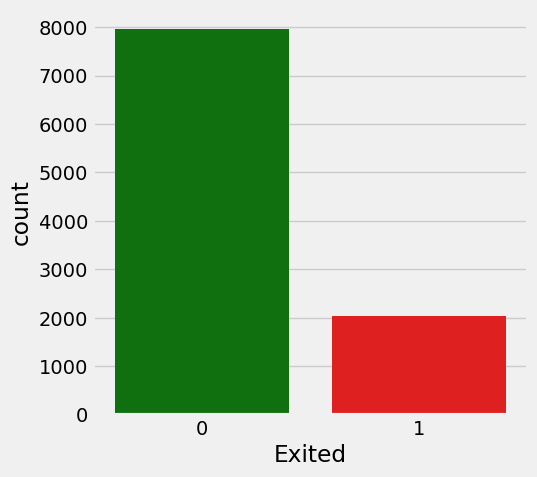

In [47]:
# Display a frequency distribution for churn

plt.figure(figsize=(5,5))

ax = sns.countplot(x=df['Exited'],hue_order=[0,1],
            palette = ['green', 'red'], linewidth = 100)

plt.show()

### The plot shows a class imbalance of the data between churners and non-churners. To address this, resampling would be a suitable approach. To keep this case simple, the imbalance is kept forward and specific metrics are chosen for model evaluations

In [42]:
plots = {
    1: [111],
    2: [121, 122],
    3: [131, 132, 133],
    4: [221, 222, 223, 224],
    5: [231, 232, 233, 234, 235],
    6: [231, 232, 233, 234, 235, 236]
}

def boxplot(x, y, df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7 * columns, 7 * rows))

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(
            x=x,
            y=j,
            hue_order=[0,1],
            palette = ['green', 'red'],
            data=df[[x,j]],
            linewidth=1
        )    
        ax.set_title(j)

    return plt.show()


In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


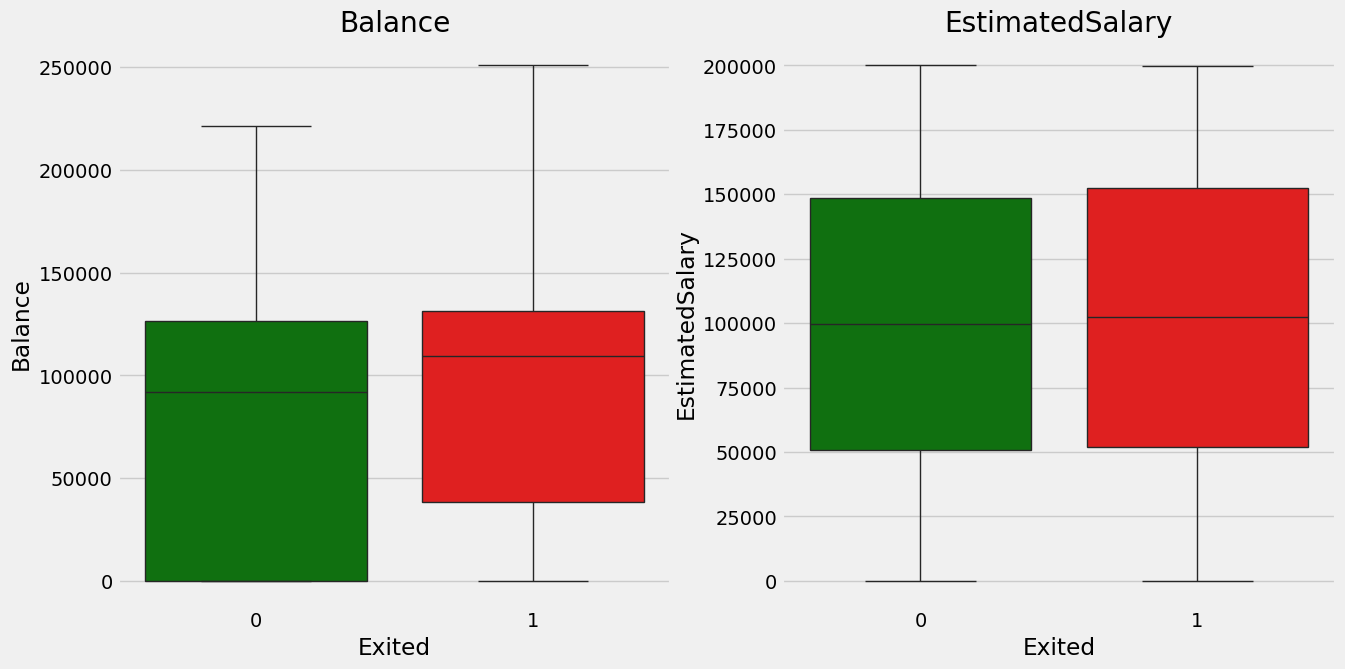

In [43]:
boxplot("Exited", ["Balance","EstimatedSalary"],df)

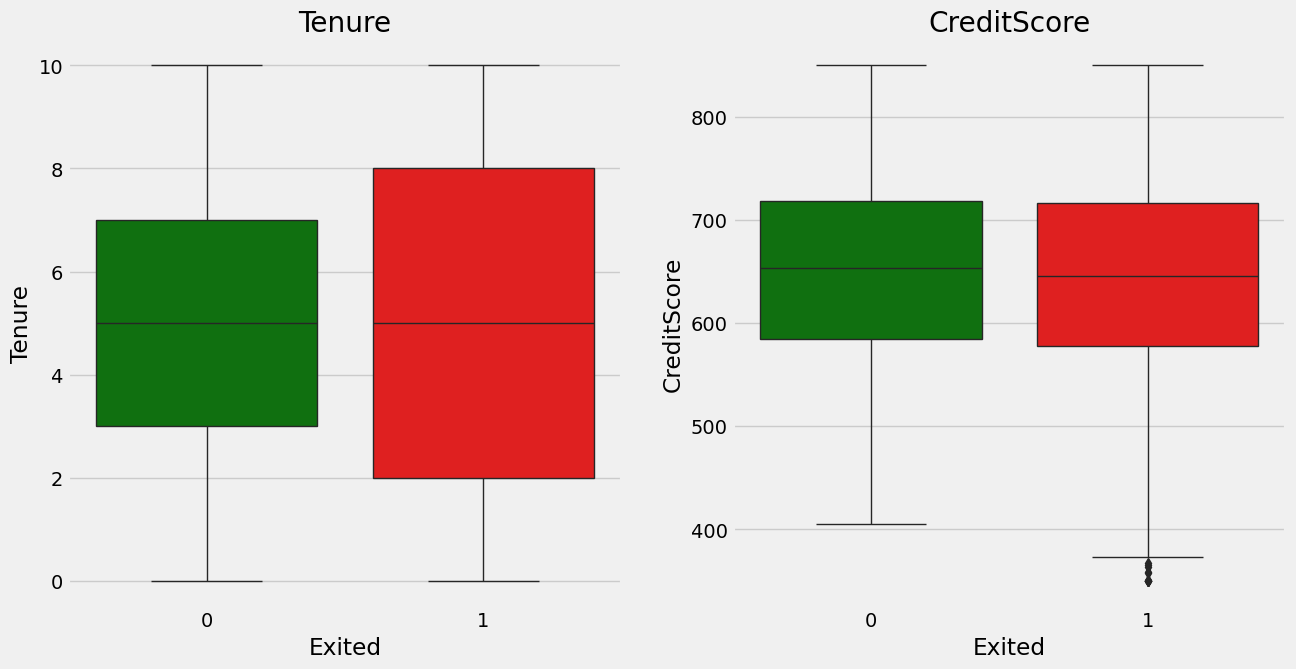

In [44]:
boxplot("Exited", ["Tenure","CreditScore"],df)

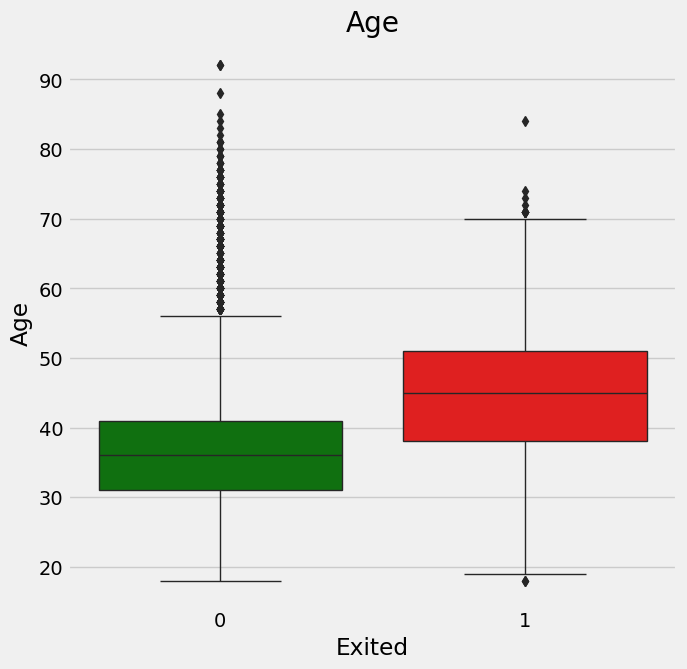

In [31]:
boxplot("Exited", ["Age"],df)

### Plot insights:

#### People in the age group 40 - 50 have a higher tendency to exit

In [50]:
plots = {
    1: [111],
    2: [121, 122],
    3: [131, 132, 133],
    4: [221, 222, 223, 224],
    5: [231, 232, 233, 234, 235],
    6: [231, 232, 233, 234, 235, 236]
}

def countplot(x, y, df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7 * columns, 7 * rows))

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(
            x=j,
            hue=x,
            hue_order=[0,1],
            palette=['green', 'red'],
            data=df,
            edgecolor='black',
            alpha=0.8,
            linewidth=1
        )
        ax.set_title(j)

    return plt.show()


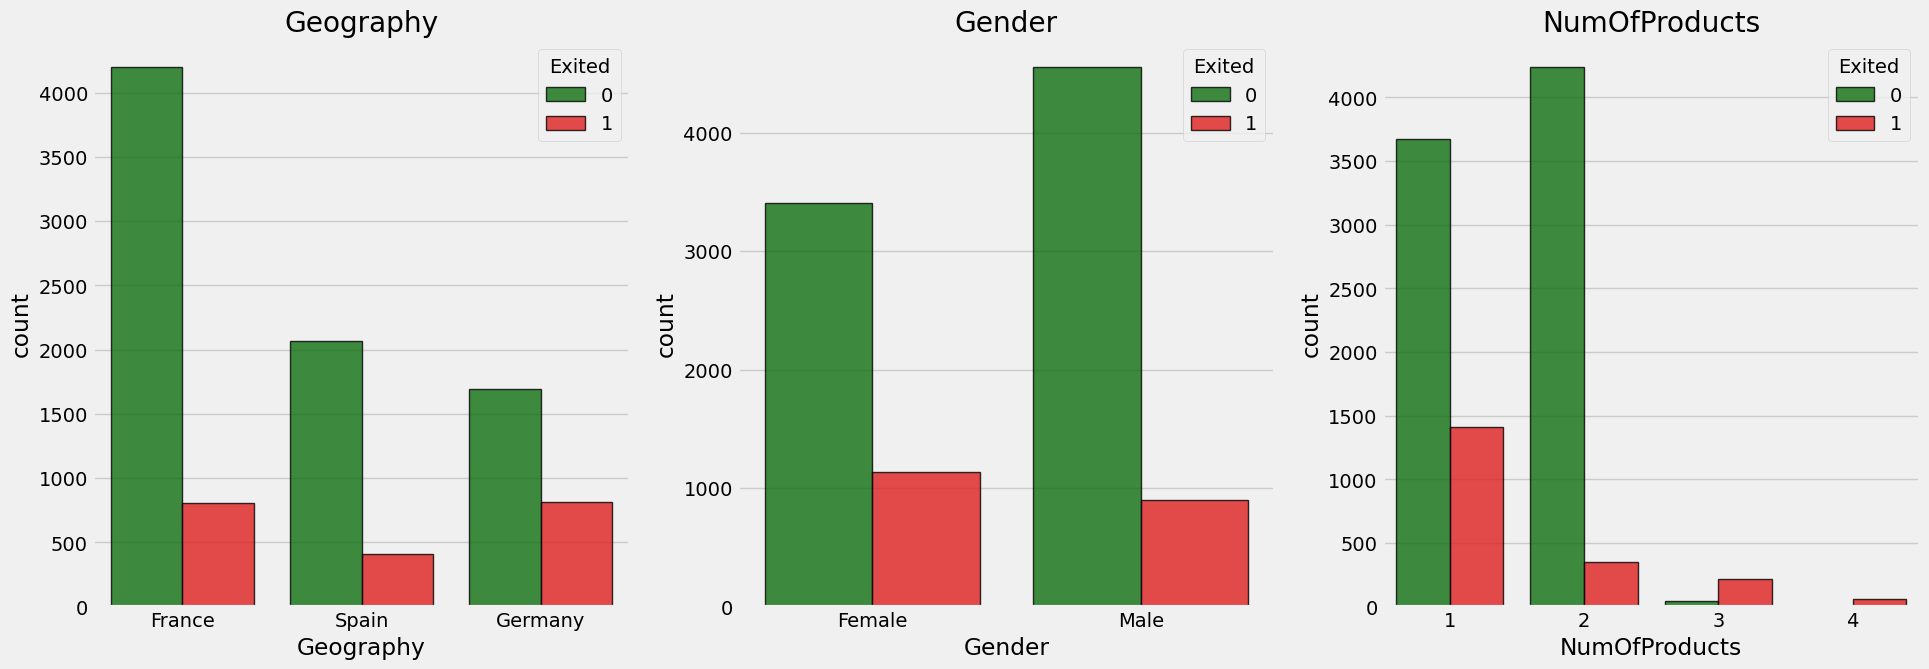

In [51]:
countplot("Exited",["Geography","Gender","NumOfProducts"],df)

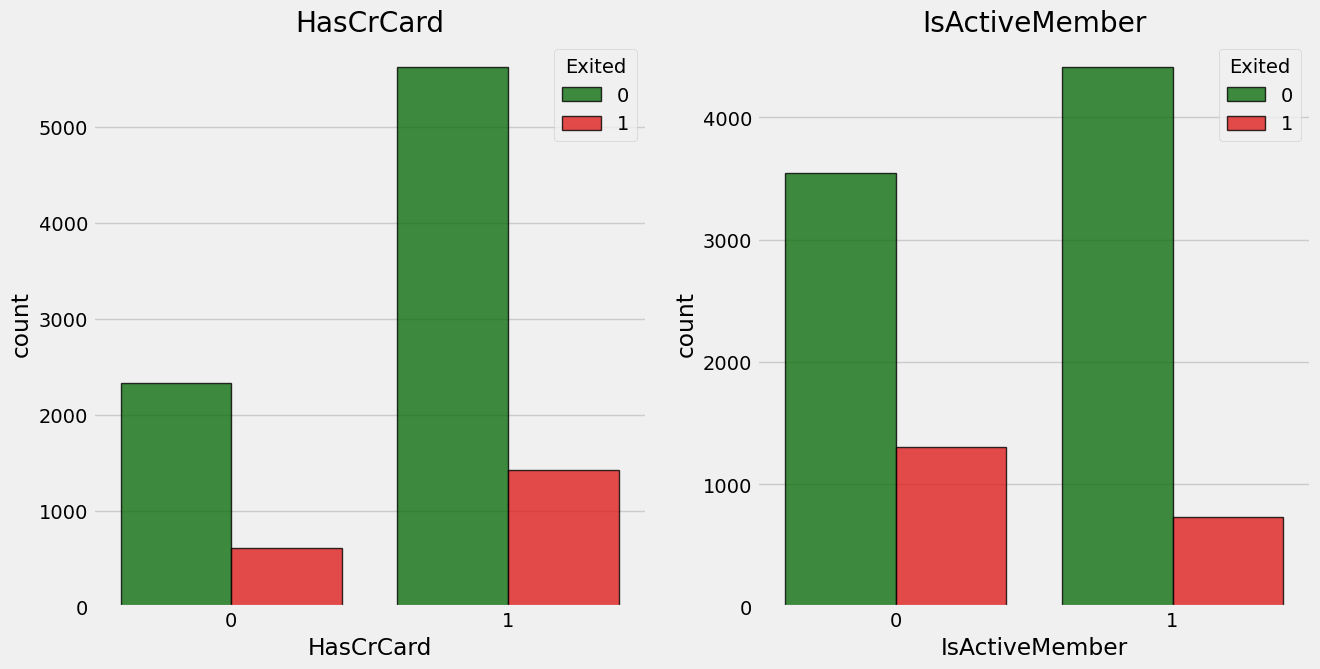

In [39]:
countplot("Exited",["HasCrCard","IsActiveMember"],df)

### Plot insights:

#### Exit rate is higher among Germans compared to other countries.
#### Exit rate of Female is more than the Exit rate of Male .


## Check for Outliers in Numerical Features

In [52]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
numerical_features = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
df_num = df[numerical_features]
df_num.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [54]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3 - Q1

IQR
((df_num < (Q1 - 1.5*IQR)) | (df_num > (Q3 + 1.5*IQR))).any()

CreditScore         True
Age                 True
Tenure             False
Balance            False
EstimatedSalary    False
dtype: bool

### Data Cleaning

In [55]:
df = df.dropna()

In [56]:
df = df.drop(columns =['RowNumber','CustomerId','Surname'])

### Label Encoding

In [57]:
df['Gender'] = df['Gender'].map({'Female':1,'Male':0})

### One-Hot Encoding

In [58]:
ohe_features = ['Geography']

df = pd.get_dummies(df,columns=ohe_features)

In [59]:
df.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Feature Scaling : Min-Max-Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

mms_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

df[mms_features] = scaler.fit_transform(df[mms_features])


In [61]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


### Correlation analysis

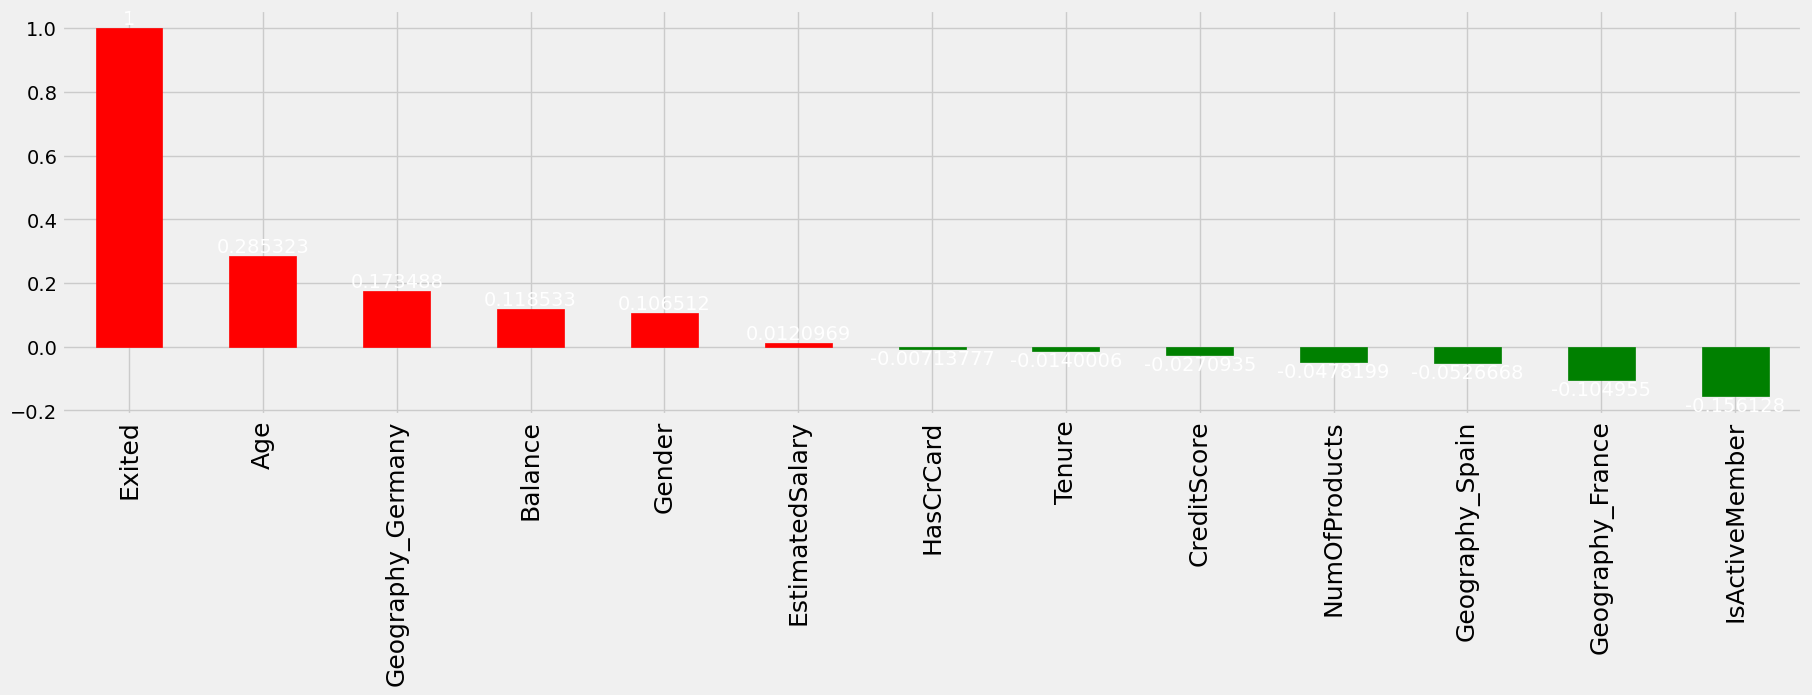

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
ax = df.corr()['Exited'].sort_values(ascending=False).plot(kind='bar', figsize=(20, 5))

# Customize the color of positive bars to green and negative bars to red
ax.bar_label(ax.containers[0], color='white')  # Set the color of bar labels to white
for bar in ax.containers[0]:
    if bar.get_height() >= 0:
        bar.set_color('red')  # Set positive bars to green
    else:
        bar.set_color('green')  # Set negative bars to red

# Customize the label size
ax.tick_params(axis='x', labelsize=18)  # Increase the x-axis label size
ax.tick_params(axis='y', labelsize=14)  # Increase the y-axis label size

plt.show()


<Axes: >

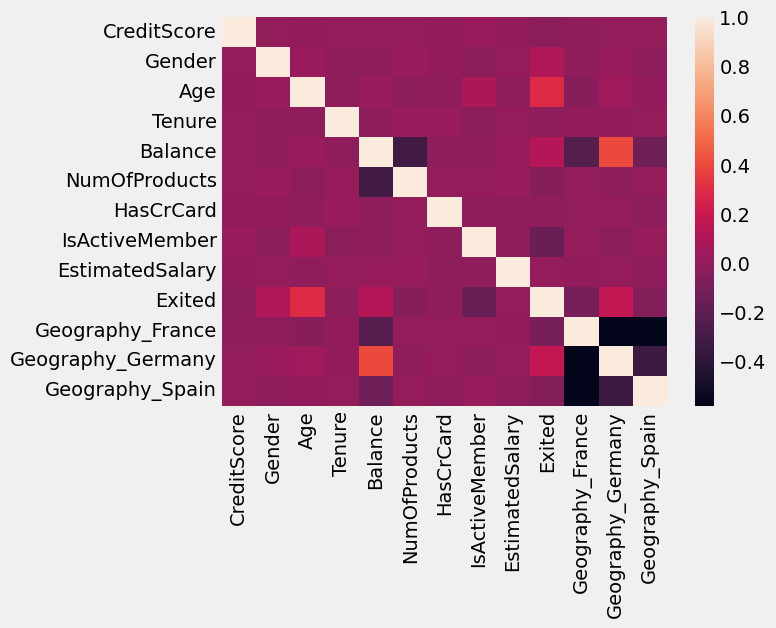

In [63]:
sns.heatmap(df.corr(),fmt='.2g')

In [66]:
df.to_csv('BankCustomerChurnScaled.csv', index=False)


In [67]:
import os
print(os.getcwd())


C:\Users\prana\Desktop\Data Science\NLP


## Machine learning

### Train-Test-Split

In [65]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited',axis=1)
y=df['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)